In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file = '/content/drive/MyDrive/Colab Notebooks/gangnam/data/gangnam_parking.csv'
df= pd.read_csv(file, encoding='euc-kr')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,시군구명,도로명 주소,지번 주소,세부위치
0,서울특별시 강남구,서울특별시 강남구 학동로 401,서울특별시 강남구 청담동 41-2,강남구청역 4번 출구
1,서울특별시 강남구,서울특별시 강남구 봉은사로 502,서울특별시 강남구 삼성동 145,삼성중앙역 5번 출구
2,서울특별시 강남구,서울특별시 강남구 테헤란로 202,서울특별시 강남구 역삼동 717,역삼역 8번 출구
3,서울특별시 강남구,서울특별시 강남구 삼성로 654,서울특별시 강남구삼성동 52,청담역 6번 출구
4,서울특별시 강남구,서울특별시 강남구 논현로 667,서울특별시 강남구 논현동 129-1,학동역 9번 출구


In [ ]:
gangnam_parking_data = df

In [ ]:
gangnam_parking_data.drop(['시군구명'], axis=1, inplace=True)

In [ ]:
gangnam_parking_data.head()

,도로명 주소,지번 주소,세부위치
0,서울특별시 강남구 학동로 401,서울특별시 강남구 청담동 41-2,강남구청역 4번 출구
1,서울특별시 강남구 봉은사로 502,서울특별시 강남구 삼성동 145,삼성중앙역 5번 출구
2,서울특별시 강남구 테헤란로 202,서울특별시 강남구 역삼동 717,역삼역 8번 출구
3,서울특별시 강남구 삼성로 654,서울특별시 강남구삼성동 52,청담역 6번 출구
4,서울특별시 강남구 논현로 667,서울특별시 강남구 논현동 129-1,학동역 9번 출구


In [ ]:
gangnam_parking_data['지번 주소'] = gangnam_parking_data['지번 주소'].str.replace('서울특별시 강남구', '')
gangnam_parking_data['지번 주소'] = gangnam_parking_data['지번 주소'].str.replace('서울특별시', '')
gangnam_parking_data['지번 주소'] = gangnam_parking_data['지번 주소'].apply(lambda x: x[:-3])
gangnam_parking_data.loc[0, '지번 주소'] = gangnam_parking_data.loc[0, '지번 주소'][:-1]
gangnam_parking_data.loc[4, '지번 주소'] = gangnam_parking_data.loc[4, '지번 주소'][:-3]
gangnam_parking_data.loc[5, '지번 주소'] = gangnam_parking_data.loc[5, '지번 주소'][:-3]
gangnam_parking_data.loc[8, '지번 주소'] = gangnam_parking_data.loc[8, '지번 주소'][:-3]
gangnam_parking_data.loc[9, '지번 주소'] = gangnam_parking_data.loc[9, '지번 주소'][:-1]

In [ ]:
gangnam_parking_data['지번 주소'] = gangnam_parking_data['지번 주소'].str.replace(' ', '')

In [ ]:
gangnam_parking_data

,도로명 주소,지번 주소,세부위치
0,서울특별시 강남구 학동로 401,청담동,강남구청역 4번 출구
1,서울특별시 강남구 봉은사로 502,삼성동,삼성중앙역 5번 출구
2,서울특별시 강남구 테헤란로 202,역삼동,역삼역 8번 출구
3,서울특별시 강남구 삼성로 654,삼성동,청담역 6번 출구
4,서울특별시 강남구 논현로 667,논현동,학동역 9번 출구
5,서울특별시 강남구 도산대로 107,신사동,신사역 7번 출구
6,서울특별시 강남구 학동로 402,삼성동,강남구청역 1번 출구
7,서울특별시 강남구 학동로 343,논현동,강남구청역 3번 출구
8,서울특별시 강남구 테헤란로 528,대치동,삼성역 4번 출구
9,서울특별시 강남구 삼성로 706,청담동,청담역 9번 출구


In [ ]:
# 지번 주소 기준 그룹화
grouped_data = gangnam_parking_data.groupby('지번 주소')
# 그룹별 데이터 개수 계산
group_counts = grouped_data.size()

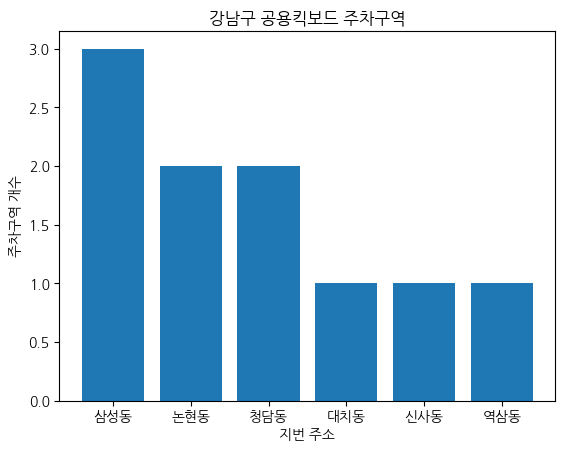

In [ ]:
# 크기순으로 정렬
sorted_counts = group_counts.sort_values(ascending=False)

# 그래프 표현
plt.rc('font', family='NanumGothic')
plt.bar(sorted_counts.index, sorted_counts)
plt.title('강남구 공용킥보드 주차구역')
plt.xlabel('지번 주소')
plt.ylabel('주차구역 개수') #주차구역 갯수
plt.show()
